# FRAUD DETECTION USING ISOLATION FOREST

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt


# Step 2: Load and Inspect the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("creditcard.csv")

# Inspect the first few rows of the dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Check Class Distribution (Imbalance Check)

In [3]:
# Check the distribution of the target variable (Class)
class_distribution = df['Class'].value_counts(normalize=True) * 100
print("Class Distribution in Percentage:")
print(class_distribution)


Class Distribution in Percentage:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


# Step 4: Preprocessing the Data

In [4]:
# Drop the 'Time' column since it's not useful for fraud detection
df = df.drop(columns=['Time'])

# Extract the feature columns (excluding 'Class' which is the target)
X = df.drop(columns=['Class'])

# Target column: 'Class' where 1 = fraud, 0 = legitimate
y = df['Class']

# Standardize the features (Isolation Forest is sensitive to the scale of data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 5: Split the Data into Train and Test Sets

In [5]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Step 6: Train Isolation Forest Model (No SMOTE)

In [6]:
# Initialize Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)  # Set contamination to 1% (fraud cases)
model.fit(X_train)

# Predict anomalies (fraudulent transactions) on the test set
y_pred = model.predict(X_test)

# Convert the model's prediction (-1 for fraud, 1 for normal) to match the target class (1 for fraud, 0 for normal)
y_pred = np.where(y_pred == -1, 1, 0)


# Step 7: Evaluate the Model

In [7]:
# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC
auc = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC: {auc}")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.08      0.49      0.14        98

    accuracy                           0.99     56962
   macro avg       0.54      0.74      0.57     56962
weighted avg       1.00      0.99      0.99     56962


Confusion Matrix:
[[56327   537]
 [   50    48]]

ROC-AUC: 0.7401761668370218


# Step 8: Visualize the Anomalies Detected

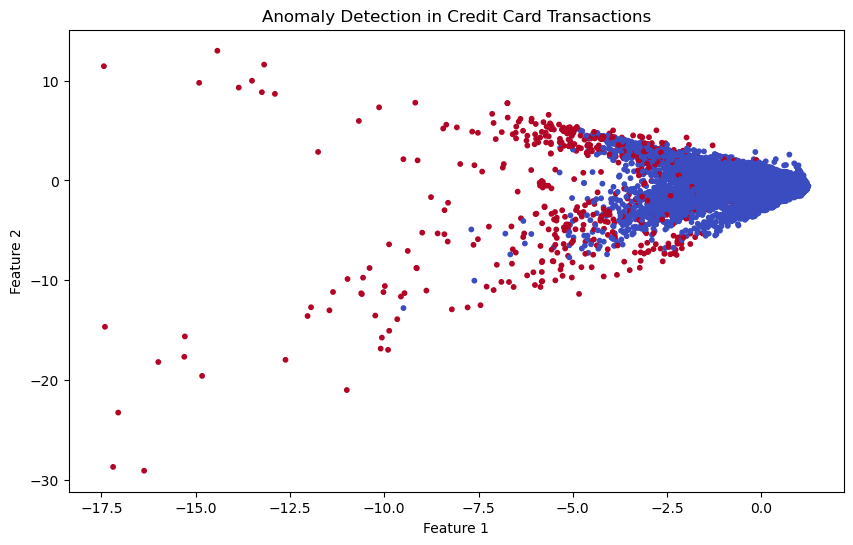

In [8]:
# Plot anomalies (fraudulent transactions) vs normal transactions in the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', s=10)
plt.title("Anomaly Detection in Credit Card Transactions")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


What the Plot Shows:
The plot visualizes two features of the test data (X_test[:, 0] and X_test[:, 1]), with fraudulent transactions and legitimate transactions represented by different colors.

X-axis (Feature 1): This is one of the features in your dataset after scaling (standardization). Since the dataset has many features, you're plotting only two of them for visualization.

Y-axis (Feature 2): This is another feature after scaling, also selected for visualization.

Color (c=y_pred): The color represents the model's prediction for each transaction:

Blue/Red (based on the colormap coolwarm):

Blue: Represents normal transactions (predicted as 1).

Red: Represents fraudulent transactions (predicted as -1 or fraud detected by the Isolation Forest).

Outcome Explanation:
Normal Transactions (Blue): These are transactions that the model has classified as legitimate (normal). They are scattered across the plot based on the values of the two features you're visualizing.

Fraudulent Transactions (Red): These are transactions the model has identified as outliers or anomalies (fraudulent transactions). The red dots in the plot represent these anomalies.

Key Insights from the Visualization:
Anomalies (Red Points): The red points are typically scattered away from the majority of the data points (blue points), indicating that the model has successfully detected outliers. These outliers are considered fraudulent transactions based on their unusual or different behavior compared to the normal transactions.

Normal Transactions (Blue Points): The blue points are clustered together, indicating they share similarities and lie within a normal range of behavior for the majority of the transactions.

Density & Separation: Since Isolation Forest works by isolating anomalies through partitioning, you might see that the red dots (fraudulent transactions) are further away or isolated compared to the blue dots (legitimate transactions).

Feature Relationships: The plot only visualizes two features. If the model is trained on many features, the plot gives a simplified view, and the actual decision boundary may depend on other features not visualized here.

# Key Adjustments:
# Since Isolation Forest is an unsupervised model, we do not apply SMOTE. The model works by learning how to isolate outliers (fraudulent transactions), so there’s no need to oversample the minority class.

# We use the contamination parameter in Isolation Forest to specify the expected proportion of fraud (anomalies). In this case, we assume fraud is around 1% of the transactions.

# The model will predict -1 for fraud and 1 for normal transactions, which is why we convert these predictions to match the original class labeling (1 for fraud and 0 for normal).